 ## Exploração de Dados com Python
**Exercício 2.1:**
Utilize o dataset `tips` da biblioteca `seaborn`. Responda às seguintes perguntas:
- Qual é a média de gorjeta (`tip`) por dia da semana?
- Qual é a proporção de fumantes (`smoker`) vs. não fumantes?
- Existe correlação entre o valor total da conta (`total_bill`) e a gorjeta (`tip`)?

**Exercício 2.2:**
Carregue o dataset `titanic` da biblioteca `seaborn`. Explore os dados para responder:
- Qual é a taxa de sobrevivência por sexo?
- Qual é a distribuição de idades dos passageiros?
- Há relação entre a classe da cabine (`pclass`) e a taxa de sobrevivência?

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dados
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

**TIPS**

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*Qual é a média de gorjeta (tip) por dia da semana?*

In [8]:
# dias da semana
# tips['day'].unique()
np.unique(tips['day'])

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [10]:
# gorjetas agrupadas por dia
tips.groupby('day')['tip'].mean().round(2)

<ipython-input-10-c774ea86558b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip'].mean().round(2)


,tip
day,
Thur,2.77
Fri,2.73
Sat,2.99
Sun,3.26


*Qual é a proporção de fumantes (smoker) vs. não fumantes?*

In [12]:
# fumantes
np.unique(tips['smoker'], return_counts=True)
tips['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [18]:
# proporcao de fumantes em %
tips['smoker'].value_counts(normalize=True).round(2)

,proportion
smoker,
No,0.62
Yes,0.38


*Existe correlação entre o valor total da conta (total_bill) e a gorjeta (tip)?*

In [17]:
tips['total_bill'].corr(tips['tip']).round(2)


0.68

**TITANIC**

In [19]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



*Qual é a taxa de sobrevivência por sexo?*
    


In [20]:
# sobreviventes
titanic['survived'].value_counts()

,count
survived,
0,549
1,342


In [23]:
# taxa relativa
titanic['survived'].value_counts(normalize=True).round(2)

,proportion
survived,
0,0.62
1,0.38


In [30]:
# sobreviventes por sexo
titanic.groupby('sex')['survived'].value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [41]:
# media de sobreviventes por sexo
titanic.groupby('sex')['survived'].mean().round(2)

,survived
sex,
female,0.74
male,0.19


In [27]:
# proporcao sexo e sobreviventes
titanic.groupby('sex')['survived'].value_counts(normalize=True).round(2).T

sex     survived
female  1           0.74
        0           0.26
male    0           0.81
        1           0.19
Name: proportion, dtype: float64

In [40]:
# todos os sobreviventes
titanic[titanic['survived'] == 1].groupby('sex')['survived'].count().round(2)

,survived
sex,
female,233
male,109


*Qual é a distribuição de idades dos passageiros?*
    

In [35]:
# describe
titanic['age'].describe().round(2)

,age
count,714.00
mean,29.70
std,14.53
min,0.42
25%,20.12
50%,28.00
75%,38.00
max,80.00


<Axes: >

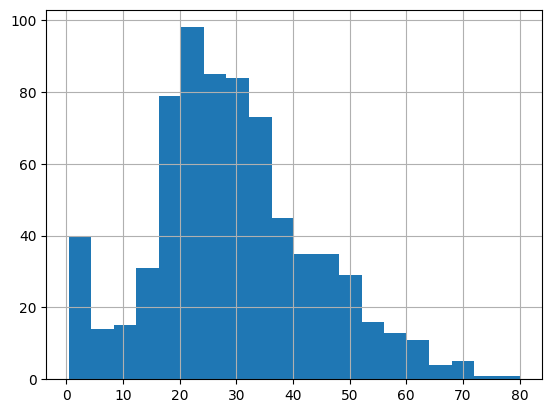

In [36]:
# frequencia
titanic['age'].hist(bins=20)

*Há relação entre a classe da cabine (pclass) e a taxa de sobrevivência?*

In [37]:
# sobreviventes agrupados por classe
titanic.groupby('pclass')['survived'].value_counts(normalize=True).round(2).T

pclass  survived
1       1           0.63
        0           0.37
2       0           0.53
        1           0.47
3       0           0.76
        1           0.24
Name: proportion, dtype: float64

In [39]:
# correlacao classe x sobrevivente
titanic['pclass'].corr(titanic['survived']).round(2)

-0.34